In [1]:
from scipy.io import loadmat

cars_meta = loadmat('devkit/cars_meta.mat')
cars_train_annos = loadmat('devkit/cars_train_annos.mat')

In [2]:
import numpy as np
import pandas as pd

class_names = []

for i in range(cars_meta['class_names'].size):
    class_names.append(cars_meta['class_names'][0][i][0])

class_names_df = pd.DataFrame({'model': class_names})
# class_names_df.to_csv('class_names.csv', index=False)

In [13]:
class_names[56]

'Chevrolet Corvette Ron Fellows Edition Z06 2007'

In [21]:
cars_bb_df = pd.DataFrame(columns=['fname', 'x1', 'y1', 'x2', 'y2', 'class'])

for i in range(cars_train_annos['annotations'].size):
    instance = cars_train_annos['annotations'][0][i]
    instance_df = pd.DataFrame({'fname': [instance['fname'][0]],
                                'x1': [instance['bbox_x1'][0][0]],
                                'y1': [instance['bbox_y1'][0][0]],
                                'x2': [instance['bbox_x2'][0][0]],
                                'y2': [instance['bbox_y2'][0][0]],
                                'class': [instance['class'][0][0] - 1]})
    cars_bb_df = cars_bb_df.append(instance_df)
    
cars_bb_df.to_csv('devkit/train_annotations.csv', index=False)

In [19]:
cars_bb_df.reset_index(drop=True, inplace=True)
instance = cars_bb_df.loc[1919]
instance

fname    01920.jpg
x1             118
y1               8
x2             790
y2             598
class          115
Name: 1919, dtype: object

Ford E-Series Wagon Van 2012


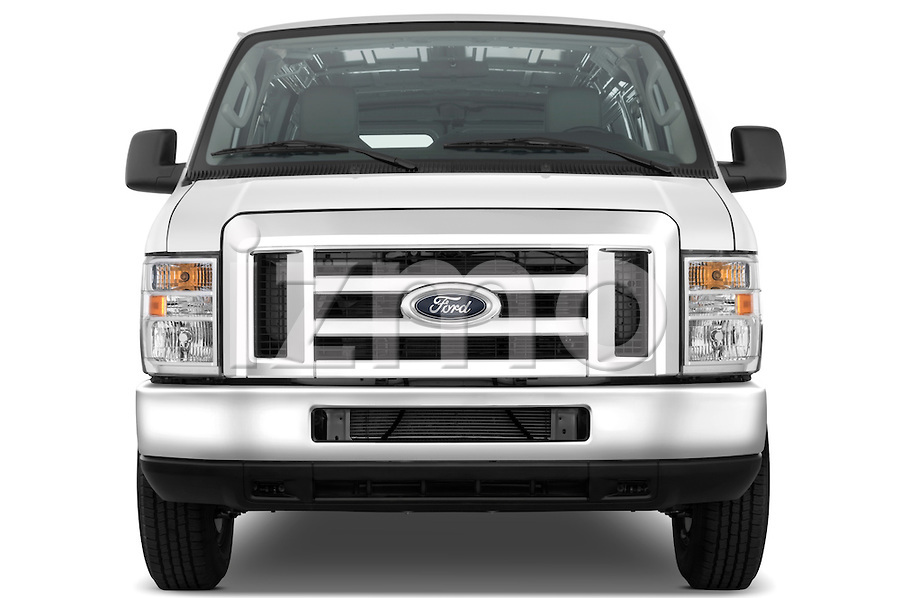

In [20]:
from PIL import Image

raw_image = Image.open('cars_train/' + instance['fname'])
print(class_names[instance['class']])
raw_image

In [23]:
for index, row in cars_bb_df.iterrows():
    if index % 200 == 0:
        print(index, end=' ')
    original = Image.open('cars_train/' + row['fname'])
    bbox = (row['x1'], row['y1'], row['x2'], row['y2'])
    cropped = original.crop(bbox)
    resized = cropped.resize(size=(224,224))
    resized.save('cars_train_prepped/' + row['fname'])

0 